In [42]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv("/content/Student_Performance.csv")

In [44]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [45]:
# count null value in each column
df.isnull().sum().reset_index(name="count")

,index,count
0,Hours Studied,0
1,Previous Scores,0
2,Extracurricular Activities,0
3,Sleep Hours,0
4,Sample Question Papers Practiced,0
5,Performance Index,0


In [46]:
df.shape

(10000, 6)

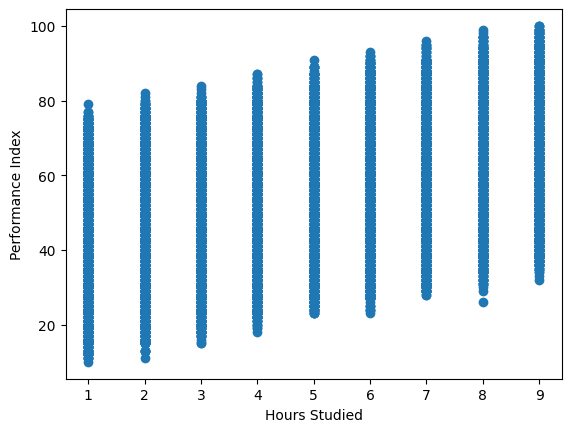

In [47]:
# scatter plot for all the dependent and independent variable
plt.scatter(df["Hours Studied"], df["Performance Index"])
plt.xlabel("Hours Studied")
plt.ylabel("Performance Index")
plt.show()

In [48]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [49]:

independent_var=['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
dependent_var=['Performance Index']

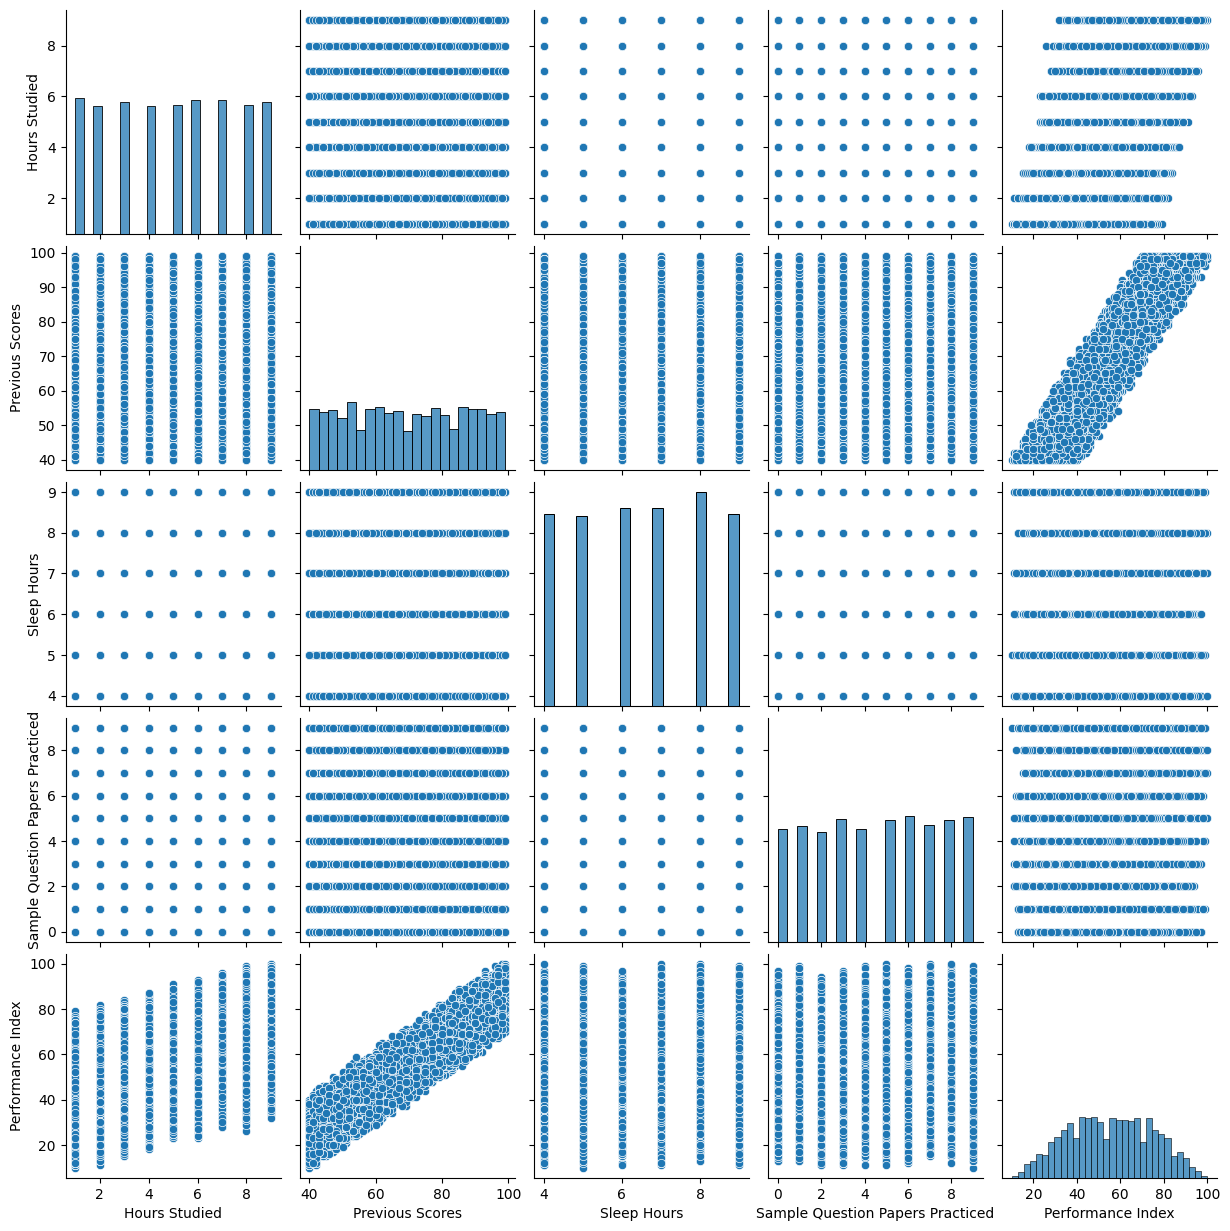

In [50]:
# pair plot
sns.pairplot(df)

In [53]:
# encoding
df["Extracurricular Activities"]= df["Extracurricular Activities"].map(lambda x : 1 if x=="Yes" else 0)

In [54]:
df["Extracurricular Activities"].value_counts().reset_index()

,Extracurricular Activities,count
0,0,10000


In [55]:
# correlation
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,NaN,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,NaN,0.005944,0.007888,0.915189
Extracurricular Activities,NaN,NaN,NaN,NaN,NaN,NaN
Sleep Hours,0.001245,0.005944,NaN,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,NaN,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,NaN,0.048106,0.043268,1.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [57]:
df.describe()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,0.0,6.530600,4.583300,55.224800
std,2.589309,17.343152,0.0,1.695863,2.867348,19.212558
min,1.000000,40.000000,0.0,4.000000,0.000000,10.000000
25%,3.000000,54.000000,0.0,5.000000,2.000000,40.000000
50%,5.000000,69.000000,0.0,7.000000,5.000000,55.000000
75%,7.000000,85.000000,0.0,8.000000,7.000000,71.000000
max,9.000000,99.000000,0.0,9.000000,9.000000,100.000000


In [58]:
df_independent=df.iloc[:,:-1]
df_independent

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,0,9,1
1,4,82,0,4,2
2,8,51,0,7,2
3,5,52,0,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,0,4,2
9996,7,64,0,8,5
9997,6,83,0,8,5
9998,9,97,0,7,0


In [16]:
df_dependent=df.iloc[:,-1:]
df_dependent

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


In [59]:
# train test split
from sklearn.model_selection import train_test_split


In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(df_independent,df_dependent,test_size=0.25,random_state=42)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

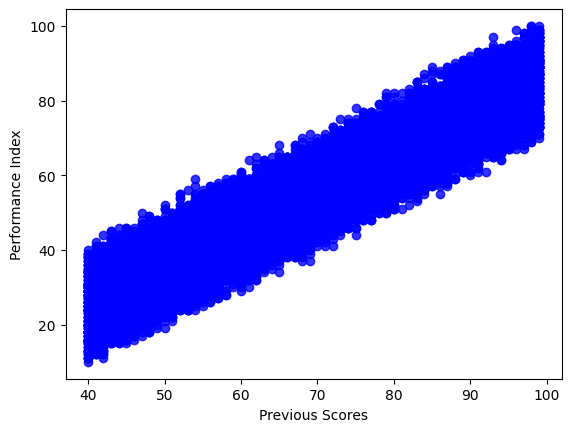

In [62]:
# it plot the fit line along a regression plot
sns.regplot(x=df["Previous Scores"],y=df["Performance Index"],color="blue")

In [63]:
# standardize the data
from sklearn.preprocessing import StandardScaler

In [64]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [65]:
# Initialize the model
from sklearn.linear_model import LinearRegression

In [66]:
regression=LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [67]:
# Cross validation
from sklearn.model_selection import cross_val_score

In [68]:
validation_score = cross_val_score(regression, X_train, Y_train, scoring="neg_mean_squared_error", cv=5)

In [69]:
validation_score

array([-4.53035808, -4.17258206, -4.2917044 , -4.25702695, -4.17847854])

In [70]:
np.mean(validation_score)

-4.2860300074286055

In [71]:
# Prediction
Y_predict = regression.predict(X_test)

In [72]:
print("coefficient : ",regression.coef_)
print("intercept : ",regression.intercept_)

coefficient :  [[7.41203862e+00 1.76216476e+01 1.42108547e-14 8.04270600e-01
  5.44886504e-01]]
intercept :  [55.4184]


In [73]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [74]:
mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r_sq = r2_score(Y_test, Y_predict)

print("MAE : ",mae)
print("MSE : ",mse)
print("RMSE : ",rmse)
print("R-Square : ", r_sq)

MAE :  1.6206826813343027
MSE :  4.152326573933449
RMSE :  2.0377258338484716
R-Square :  0.9887299686226686


In [75]:
# Adjusted R- Square
adj_r_sq = 1-(1-r_sq)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print("Adjusted r-square : ", adj_r_sq)

Adjusted r-square :  0.9887073743336202


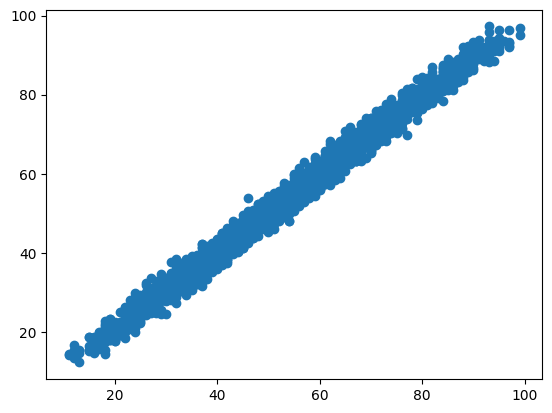

In [77]:
# Scatter plot between Y_test and Y_predict
plt.scatter(Y_test, Y_predict)

In [79]:
# difference
residuals = Y_test - Y_predict
print(residuals)

      Performance Index
6252          -4.016625
4684          -2.319521
1731          -1.612056
4742          -2.998981
4521          -2.332978
...                 ...
4862           0.281556
7025          -1.288304
7647           1.642994
7161           2.019416
73            -2.575256

[2500 rows x 1 columns]


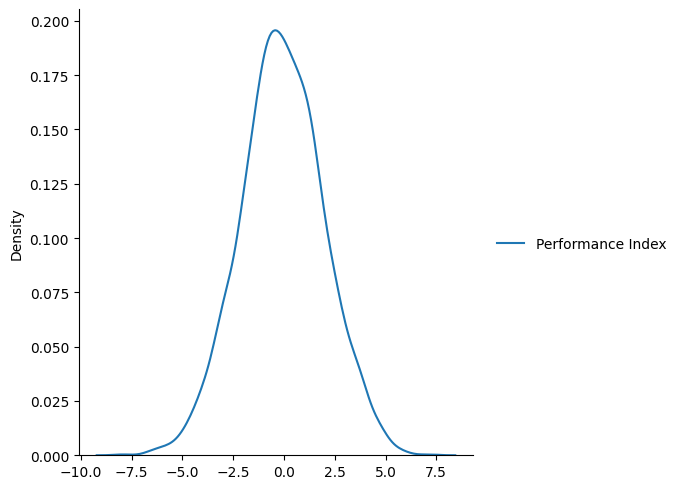

In [81]:
# If you get a normal/gaussian distribution then your model is good
sns.displot(residuals, kind="kde")

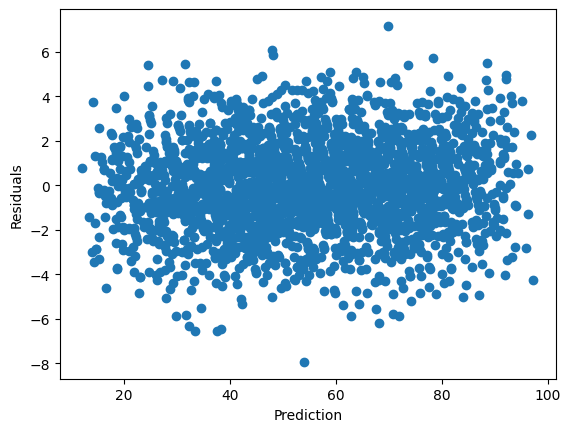

In [82]:
# Scatter Plot with respect to prediction and residuals
# It should follow random distribution
plt.scatter(Y_predict, residuals)
plt.xlabel("Prediction")
plt.ylabel("Residuals")
plt.show()

In [83]:
# LR with OLS
import statsmodels.api as sm

In [84]:
model = sm.OLS(Y_train, X_train).fit()
model

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.106
Model:                            OLS   Adj. R-squared (uncentered):              0.106
Method:                 Least Squares   F-statistic:                              222.3
Date:                Thu, 22 Aug 2024   Prob (F-statistic):                   1.29e-180
Time:                        13:01:28   Log-Likelihood:                         -40759.
No. Observations:                7500   AIC:                                  8.153e+04
Df Residuals:                    7496   BIC:                                  8.155e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.4120      0.641     11.570      0.000       6.156       8.668
x2            17.6216      0.641     27.509      0.000      16.366      18.877
const      -1.713e-14   2.67e-15     -6.406      0.000   -2.24e-14   -1.19e-14
x3             0.8043      0.641      1.256      0.209      -0.451       2.060
x4             0.5449      0.641      0.851      0.395      -0.711       1.801
==============================================================================
Omnibus:                        1.955   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.944
Skew:                           0.019   Prob(JB):                        0.378
Kurtosis:                       3.069   Cond. No.                     1.69e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.67e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [86]:
reg_df = pd.DataFrame({
    "Coefficient": model.params,
    "P-Value": model.pvalues,
    "Standard Error": model.bse,
    "T-Statistic": model.tvalues
})
reg_df

,Coefficient,P-Value,Standard Error,T-Statistic
x1,7.412039e+00,1.066249e-30,6.406312e-01,11.569900
x2,1.762165e+01,8.546324e-159,6.405747e-01,27.509122
const,-1.712887e-14,1.588977e-10,2.674075e-15,-6.405531
x3,8.042706e-01,2.093189e-01,6.405731e-01,1.255548
x4,5.448865e-01,3.950231e-01,6.405967e-01,0.850592
